In [1]:
from app.data import Data
from app.content_based import ContentBased

data = Data()
content_based = ContentBased()

In [2]:
df_meta_data = data.read_articles_meta_data()
df_meta_data.head()

,category_id,created_at_ts,publisher_id,words_count
0,0,1513144419000,0,168
1,1,1405341936000,0,189
2,1,1408667706000,0,250
3,1,1408468313000,0,230
4,1,1407071171000,0,162


In [3]:
df_embeddings = data.read_embeddings()
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


In [4]:
df_embeddings[df_embeddings.isna()].sum(axis=1).value_counts()

0.0    364047
Name: count, dtype: int64

In [5]:
df_meta_data[['category_id', 'publisher_id', 'words_count']].describe()

,category_id,publisher_id,words_count
count,364047.000000,364047.0,364047.000000
mean,283.108239,0.0,190.897727
std,136.723470,0.0,59.502766
min,0.000000,0.0,0.000000
25%,199.000000,0.0,159.000000
50%,301.000000,0.0,186.000000
75%,399.000000,0.0,218.000000
max,460.000000,0.0,6690.000000


<Axes: >

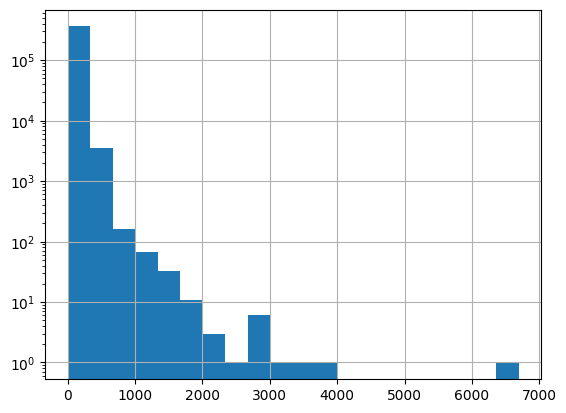

In [6]:
df_meta_data['words_count'].hist(bins=20, log=True)

In [7]:
df = content_based.prepare_df(df_meta_data=df_meta_data, df_embeddings=df_embeddings)

In [8]:
df.head()

,created_at_ts,words_count,0,1,2,3,4,5,6,7,...,category_id_452,category_id_453,category_id_454,category_id_455,category_id_456,category_id_457,category_id_458,category_id_459,category_id_460,publisher_id_0
0,0.910177,-0.384818,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,...,False,False,False,False,False,False,False,False,False,True
1,-1.600927,-0.031893,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,...,False,False,False,False,False,False,False,False,False,True
2,-1.523458,0.993271,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,...,False,False,False,False,False,False,False,False,False,True
3,-1.528102,0.657151,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,...,False,False,False,False,False,False,False,False,False,True
4,-1.560647,-0.485654,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,...,False,False,False,False,False,False,False,False,False,True


In [9]:
df[['created_at_ts', 'words_count']].describe().round(2)

,created_at_ts,words_count
count,364047.00,364047.00
mean,-0.00,-0.00
std,1.00,1.00
min,-7.33,-3.21
25%,-0.68,-0.54
50%,0.36,-0.08
75%,0.83,0.46
max,1.09,109.22
